# Task 2: Load the Data and Libraries


In [84]:
    import matplotlib.pyplot as plt
    plt.style.use ('ggplot')
    %matplotlib inline
   


In [85]:
    import numpy as np
    import pandas as pd  
    import seaborn as sns  
    plt.rcParams['figure.figsize'] = (9, 6)


In [86]:
data = pd.read_csv('bike_sharing_data.txt')
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


# Task 3: Visualize the Data

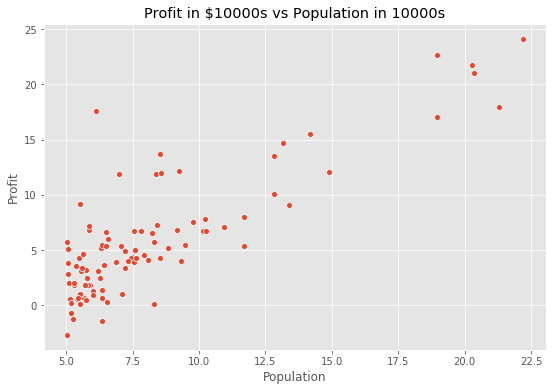

In [88]:
ax = sns.scatterplot(x="Population", y="Profit", data=data)
ax.set_title("Profit in $10000s vs Population in 10000s");

# Task 4: Compute the Cost $J(θ)$

# 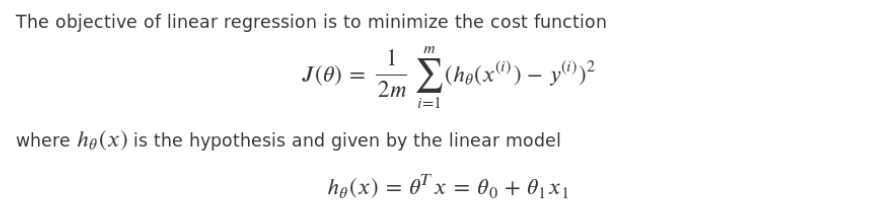

In [89]:
def cost_function(X, y, theta):
    m = len(y)
    y_pred = X.dot(theta)
    error = (y_pred - y) ** 2
    
    return 1 / (2 * m) * np.sum(error)

In [90]:
m = data.Population.values.size
X = np.append(np.ones((m, 1)), data.Population.values.reshape(m, 1), axis=1)
y = data.Profit.values.reshape(m, 1)
theta = np.zeros((2,1))

cost_function(X, y, theta)

32.072733877455676

# Task 5: Gradient Descent

# 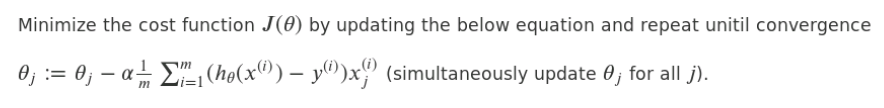

In [91]:
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    costs = []
    for i in range(iterations):
        y_pred = X.dot(theta)
        error = np.dot(X.transpose(), (y_pred - y))
        theta -= alpha * 1/m * error
        costs.append(cost_function(X, y, theta))
    return theta, costs

In [92]:
theta, costs = gradient_descent(X, y, theta, alpha=0.01, iterations=2000)

print("h(x) = {} + {}x1".format(str(round(theta[0, 0], 2)),
                               str(round(theta[1, 0], 2))))

h(x) = -3.79 + 1.18x1


# Task 6: Visualising the Cost Function $J(θ)$

In [93]:
from mpl_toolkits.mplot3d import Axes3D

In [94]:
theta_0 = np.linspace(-10, 10, 100)
theta_1 = np.linspace(-1, 4, 100)

cost_values = np.zeros((len(theta_0), len(theta_1)))

for i in range(len(theta_0)):
    for j in range(len(theta_1)):
        t = np.array([theta_0[i], theta_1[j]])
        cost_values[i, j] = cost_function(X, y, t)

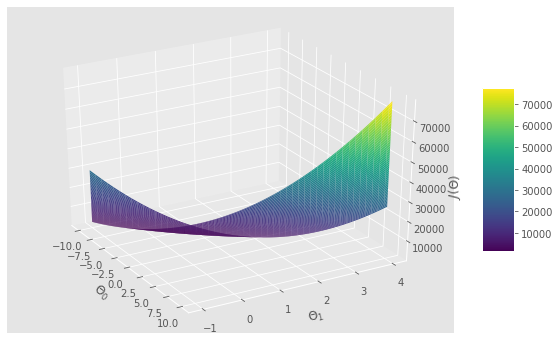

In [95]:
fig = plt.figure(figsize = (10, 6))
ax = fig.gca(projection = '3d')

surf = ax.plot_surface(theta_0, theta_1, cost_values, cmap = 'viridis')
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.xlabel("$\Theta_0$")
plt.ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")
ax.view_init(30, 330)

plt.show()

# Task 7: Plotting the Convergence

# 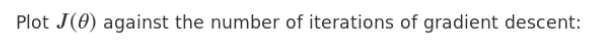# 

Text(0.5, 1.0, 'Values of the Cost function over Iterations of Gradient descent')

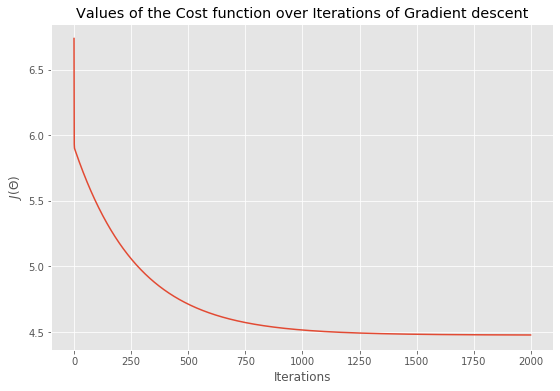

In [96]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Values of the Cost function over Iterations of Gradient descent")

# Task 8: Training Data with Linear Regression Fit

In [97]:
theta.shape

(2, 1)

In [98]:
theta

array([[-3.78806857],
       [ 1.18221277]])

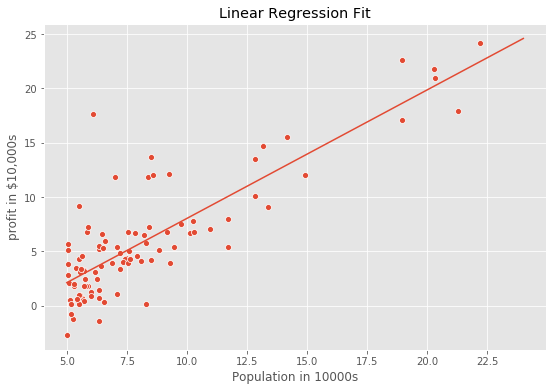

In [99]:
theta = np.squeeze(theta)
sns.scatterplot(x="Population", y="Profit", data=data)

x_value = [x for x in range(5, 25)]
y_value = [(x * theta[1] + theta[0]) for x in x_value]
sns.lineplot(x_value, y_value)

plt.xlabel("Population in 10000s")
plt.ylabel("profit in $10,000s")
plt.title("Linear Regression Fit");

# Task 9: Inference using the optimized $θ$ values 

# 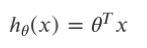

In [100]:
def predict(x, theta):
    y_pred = np.dot(theta.transpose(), x)
    return y_pred

In [101]:
y_pred_1 = predict(np.array([1, 4]), theta) * 10000
print("For a Population of 40,000 people, the model predicts a profit of $" + str(round(y_pred_1, 0)))

For a Population of 40,000 people, the model predicts a profit of $9408.0


In [102]:
y_pred_2 = predict(np.array([1, 8.3]), theta) * 10000
print("For a Population of 40,000 people, the model predicts a profit of $" + str(round(y_pred_2, 0)))

For a Population of 40,000 people, the model predicts a profit of $60243.0
